In [1]:
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import json
import pandas as pd

In [7]:
users_df = pd.read_csv("takehome_users.csv", parse_dates=True)
user_engagement_df = pd.read_csv("takehome_user_engagement.csv", parse_dates=True)

In [8]:
user_df_copy = users_df.copy()
user_engagement_copy = user_engagement_df.copy()

In [9]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [10]:
user_engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
user_full_df = pd.merge(users_df, user_engagement_df,  how='outer', left_on=['object_id'], right_on = ['user_id'])


In [12]:
user_full_df_copy = user_full_df.copy()
user_full_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2.0,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2.0,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2.0,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2.0,1.0


In [13]:
user_full_df.shape

(211094, 13)

In [14]:
user_full_df['last_session_creation_time'] = pd.to_datetime(user_full_df['last_session_creation_time'],unit='s')

In [15]:
user_full_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,1.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,2.0,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-29 03:45:04,2.0,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-09 03:45:04,2.0,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-25 03:45:04,2.0,1.0


In [17]:
user_full_df.groupby('object_id').head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,1.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,2.0,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-29 03:45:04,2.0,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-09 03:45:04,2.0,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-25 03:45:04,2.0,1.0
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-31 03:45:04,2.0,1.0
15,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,2013-03-19 23:14:52,3.0,1.0
16,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,2013-05-22 08:09:28,4.0,1.0
17,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,2013-01-22 10:14:20,5.0,1.0
18,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,2013-12-19 03:37:06,6.0,1.0


In [20]:
user_full_df['time_stamp'] = pd.to_datetime(user_full_df['time_stamp'], errors='coerce')

In [21]:
user_full_df['Week_Number'] = user_full_df['time_stamp'].dt.week

In [19]:
user_full_df.dtypes

object_id                              int64
creation_time                         object
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
time_stamp                            object
user_id                              float64
visited                              float64
dtype: object

In [23]:
user_full_df.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited,Week_Number
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,1.0,1.0,17.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,2.0,1.0,46.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-29 03:45:04,2.0,1.0,48.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-09 03:45:04,2.0,1.0,50.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-25 03:45:04,2.0,1.0,52.0
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-31 03:45:04,2.0,1.0,1.0
6,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2014-01-08 03:45:04,2.0,1.0,2.0
7,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2014-02-03 03:45:04,2.0,1.0,6.0
8,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2014-02-08 03:45:04,2.0,1.0,6.0
9,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2014-02-09 03:45:04,2.0,1.0,6.0


In [25]:
g = user_full_df.groupby(["object_id", "Week_Number"])
print g.groups

{(7283, 17.0): [130171, 130260], (11270, 9.0): [201250, 201251, 201252], (10514, 22.0): [188184, 188185, 188186, 188187, 188188], (10832, 37.0): [194097, 194168], (2621, 29.0): [45296], (2002, 2.0): [32968, 32969, 32970, 32971], (7209, 2.0): [128993, 128994, 129082, 129083, 129084, 129085], (7518, 20.0): [132983, 132984], (8182, 47.0): [144727], (2425, 44.0): [40358, 40359], (11198, 19.0): [200049, 200050, 200051, 200052, 200053, 200054], (3204, 12.0): [56040, 56041, 56042, 56043], (450, 3.0): [7176, 7177, 7178, 7179, 7180, 7181], (512, 10.0): [8736, 8737, 8738, 8739, 8740], (4745, 4.0): [86894, 86895, 86896, 86897], (3137, 39.0): [53935, 53936, 53937, 53938, 53939], (4565, 51.0): [83795, 83796, 83797, 83798, 83799, 83800, 83801], (4043, 7.0): [71511], (9, nan): [21], (2316, 20.0): [38638, 38639, 38640, 38641, 38642, 38966, 38967, 38968, 38969], (5662, nan): [104629], (11738, 22.0): [207475, 207476, 207477, 207478, 207479], (2539, 26.0): [42720, 42721], (2809, 7.0): [48993, 48994, 4899

In [28]:
d = g.aggregate(len)
d = d.reset_index().rename(columns={"object_id": "num_entries"})

In [30]:
d.head(20)

,num_entries,Week_Number,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
0,1,17.0,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,1,1.0,1970-01-01 00:00:00.000000001,1.0,1.0
1,2,1.0,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,1,1.0,1970-01-01 00:00:00.000000001,1.0,1.0
2,2,2.0,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,1,1.0,1970-01-01 00:00:00.000000001,1.0,1.0
3,2,6.0,3,3,3,3,1970-01-01 00:00:00.000000003,3,3,3,3.0,1970-01-01 00:00:00.000000003,3.0,3.0
4,2,7.0,2,2,2,2,1970-01-01 00:00:00.000000002,2,2,2,2.0,1970-01-01 00:00:00.000000002,2.0,2.0
5,2,10.0,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,1,1.0,1970-01-01 00:00:00.000000001,1.0,1.0
6,2,11.0,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,1,1.0,1970-01-01 00:00:00.000000001,1.0,1.0
7,2,14.0,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,1,1.0,1970-01-01 00:00:00.000000001,1.0,1.0
8,2,46.0,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,1,1.0,1970-01-01 00:00:00.000000001,1.0,1.0
9,2,48.0,1,1,1,1,1970-01-01 00:00:00.000000001,1,1,1,1.0,1970-01-01 00:00:00.000000001,1.0,1.0


In [34]:
week_count = user_full_df.groupby('object_id').Week_Number.count()

In [51]:
#type(week_count)
#s.between(0,1).any()
import numpy as np
users_df['Adopted'] = np.NaN

In [68]:
for index, count  in week_count.iteritems():
    if user_full_df[user_full_df['object_id']==index]['Week_Number'].value_counts().between(3,52).any():
        #users_df[users_df['object_id'] == index]['Adopted'] = 1
        users_df.at[index-1, 'Adopted'] = 1
    else:
        #users_df[users_df['object_id'] == index]['Adopted'] = 0
        users_df.at[index-1, 'Adopted'] = 0


In [69]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted
0,1.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1.0,0.0,11.0,10803.0,0.0
1,2.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0.0,0.0,1.0,316.0,1.0
2,3.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0.0,0.0,94.0,1525.0,0.0
3,4.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0.0,0.0,1.0,5151.0,0.0
4,5.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0.0,0.0,193.0,5240.0,0.0


In [95]:
users_df['enabled_for_marketing_drip'].unique()

array([  0.,   1.,  nan])

In [85]:
users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'],unit='s')

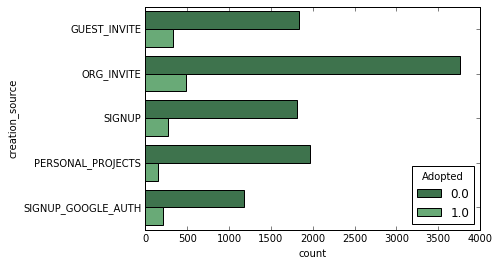

In [90]:
g1 = sns.countplot(y="creation_source", hue="Adopted", data=users_df, palette="Greens_d");
#g1.fig.set_size_inches(15,15)


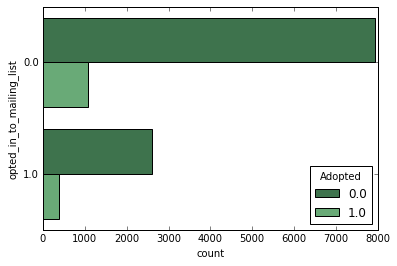

In [92]:
sns.countplot(y="opted_in_to_mailing_list", hue="Adopted", data=users_df, palette="Greens_d");

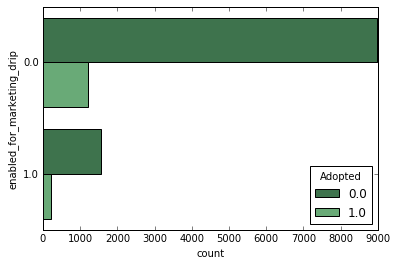

In [96]:
sns.countplot(y="enabled_for_marketing_drip", hue="Adopted", data=users_df, palette="Greens_d");

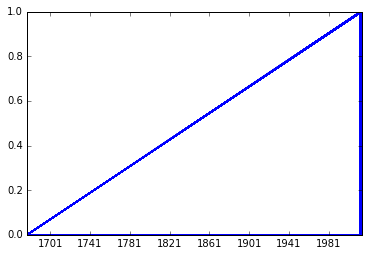

In [103]:
plt.plot(users_df['last_session_creation_time'], users_df['Adopted'], marker='.')
plt.figure(figsize=(15,15))
plt.show()